In [12]:
%matplotlib inline

In [6]:
import os
import time
import warnings

import pandas as pd
import nilmtk
from nilmtk import DataSet, MeterGroup, HDFDataStore
from nilmtk.disaggregate import CombinatorialOptimisation, FHMM, Hart85
from nilmtk.feature_detectors.steady_states import find_steady_states_transients, find_steady_states


warnings.filterwarnings("ignore")

import sys
import json


ds_path = "/Users/nipunbatra/wikienergy-2013.h5"


with open('../../data/hvac/top_k_2013.json', 'r') as fp:
    top_k_dict = json.load(fp)

num_states = 2
K = 2
train_fraction = 0.5

print("*"*80)
print("Arguments")

print("Number states", num_states)
print("Train fraction is ", train_fraction)
print("Top k", K)

out_file_name = "N%d_K%d_T%s" % (num_states, K, sys.argv[4])

ds = DataSet(ds_path)

def find_specific_appliance(appliance_name, appliance_instance, list_of_elecs):
    for elec_name in list_of_elecs:
        appl = elec_name.appliances[0]
        if (appl.identifier.type, appl.identifier.instance) == (appliance_name, appliance_instance):
            return elec_name





********************************************************************************
Arguments
('Number states', 2)
('Train fraction is ', 0.5)
('Top k', 2)


In [14]:
b_id = 1
cls_dict = {"CO": CombinatorialOptimisation(), "FHMM": FHMM(), "Hart": Hart85()}
elec = ds.buildings[b_id].elec
mains = elec.mains()

train = DataSet(ds_path)
test = DataSet(ds_path)
split_point = elec.train_test_split(train_fraction=train_fraction).date()
train.set_window(end=split_point)
test.set_window(start=split_point)
train_elec = train.buildings[b_id].elec
test_elec = test.buildings[b_id].elec
test_mains = test_elec.mains()

    # AC elec
ac_elec_train = train_elec[('air conditioner', 1)]
ac_elec_test = test_elec[('air conditioner', 1)]

num_states_dict = {ac_elec_train: num_states}


# Finding top N appliances
top_k_train_list = top_k_dict[str(b_id)][:K]
print("Top %d list is " %(K), top_k_train_list)
top_k_train_elec = MeterGroup([m for m in ds.buildings[b_id].elec.meters if m.instance() in top_k_train_list])

#print ("../../bash_runs/%s" % (out_file_name))
#if not os.path.exists("../../bash_runs/%s" % (out_file_name)):
#    os.makedirs("../../bash_runs/%s" % (out_file_name))


# Add this fridge to training if this fridge is not in top-k
if ac_elec_train not in top_k_train_elec.meters:
    top_k_train_elec.meters.append(ac_elec_train)

('Top 2 list is ', [1, 5])


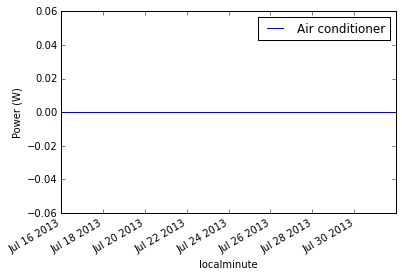

In [15]:
ac_elec_test.plot()

In [10]:
ac_elec_train.load().next()

physical_quantity,power
type,active
localminute,
2013-07-01 00:00:00-05:00,0
2013-07-01 00:01:00-05:00,0
2013-07-01 00:02:00-05:00,0
2013-07-01 00:03:00-05:00,0
2013-07-01 00:04:00-05:00,0
2013-07-01 00:05:00-05:00,0
2013-07-01 00:06:00-05:00,0
2013-07-01 00:07:00-05:00,0


In [8]:
df_train = ac_elec_train.load().next()[('power', 'active')]
power = df_train[df_train > 20]
power.describe()

count     0
mean    NaN
std     NaN
min     NaN
25%     NaN
50%     NaN
75%     NaN
max     NaN
Name: (power, active), dtype: float64

In [36]:
from nilmtk.disaggregate import Hart85

In [37]:
h = Hart85()

In [38]:
h.train(train_elec.mains())

Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


In [57]:
h.centroids

,"(power, active)"
0,234.297687
1,3320.849040


In [53]:
d = (h.centroids - power.mean()).abs()



In [59]:
power.describe()

count    7905.000000
mean     2703.008789
std       490.795197
min        51.000000
25%      2589.000000
50%      2789.000000
75%      2986.000000
max      3345.000000
Name: (power, active), dtype: float64

In [56]:
power.median()

2789.0

In [58]:
h.transients[h.transients['active transition'].abs()>2000]

,active transition
2013-07-01 00:32:00-05:00,-3434.400000
2013-07-01 00:38:00-05:00,3524.750000
2013-07-01 01:15:00-05:00,-3873.000000
2013-07-01 01:22:00-05:00,3474.153846
2013-07-01 01:45:00-05:00,-3451.000000
2013-07-01 01:52:00-05:00,3417.000000
2013-07-01 02:17:00-05:00,-3423.071429
2013-07-01 02:20:00-05:00,3580.500000
2013-07-01 02:47:00-05:00,-3385.750000
2013-07-01 02:52:00-05:00,3499.750000


In [48]:
d.sort(ascending=True).head(1).index.values[0]

0

In [44]:
h.centroids-power.mean()

,"(power, active)"
0,-2468.711102
1,617.840251


In [18]:
from nilmtk.disaggregate.hart_85 import Hart85
h = Hart85()
h.train(elec.mains())

Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


In [19]:
h.centroids

,"(power, active)"
0,227.799286
1,3326.892097


In [20]:
df_ac = elec['air conditioner'].load().next()[('power','active')]

In [23]:
df_ac[df_ac>100].describe()

count    14604.000000
mean      2734.961426
std        443.669983
min        102.000000
25%       2588.000000
50%       2803.500000
75%       3022.250000
max       3345.000000
Name: (power, active), dtype: float64

In [46]:
split_point = elec.train_test_split(train_fraction=0.2)

In [47]:
split_point.date()

datetime.date(2014, 4, 13)

In [48]:
train = DataSet("/Users/nipunbatra/Downloads/wikienergy-2.h5")
test = DataSet("/Users/nipunbatra/Downloads/wikienergy-2.h5")

In [49]:
train.set_window(end=split_point.date())



In [11]:
train.buildings[11].elec.plot()

In [16]:
test.set_window(start=split_point.date())

In [17]:
co = CombinatorialOptimisation()
co.train(elec)

Training model for submeter 'ElecMeter(instance=2, building=11, dataset='WikiEnergy', appliances=[Appliance(type='air conditioner', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=11, dataset='WikiEnergy', appliances=[Appliance(type='sockets', instance=1)])'
Training model for submeter 'ElecMeter(instance=4, building=11, dataset='WikiEnergy', appliances=[Appliance(type='sockets', instance=2)])'
Training model for submeter 'ElecMeter(instance=5, building=11, dataset='WikiEnergy', appliances=[Appliance(type='dish washer', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=11, dataset='WikiEnergy', appliances=[Appliance(type='spin dryer', instance=1)])'
Training model for submeter 'ElecMeter(instance=7, building=11, dataset='WikiEnergy', appliances=[Appliance(type='electric furnace', instance=1)])'
Training model for submeter 'ElecMeter(instance=8, building=11, dataset='WikiEnergy', appliances=[Appliance(type='sockets', instance=3)])'
Tra

In [13]:
disag_filename = 'wikienergy-disag-co-new.h5'
output = HDFDataStore(disag_filename, 'w')
co.disaggregate(elec.mains(), output)
output.close()

vampire_power = 0.0 watts
Estimating power demand for 'ElecMeter(instance=2, building=11, dataset='WikiEnergy', appliances=[Appliance(type='air conditioner', instance=1)])'
Estimating power demand for 'ElecMeter(instance=3, building=11, dataset='WikiEnergy', appliances=[Appliance(type='sockets', instance=1)])'
Estimating power demand for 'ElecMeter(instance=4, building=11, dataset='WikiEnergy', appliances=[Appliance(type='sockets', instance=2)])'
Estimating power demand for 'ElecMeter(instance=5, building=11, dataset='WikiEnergy', appliances=[Appliance(type='dish washer', instance=1)])'
Estimating power demand for 'ElecMeter(instance=6, building=11, dataset='WikiEnergy', appliances=[Appliance(type='spin dryer', instance=1)])'
Estimating power demand for 'ElecMeter(instance=7, building=11, dataset='WikiEnergy', appliances=[Appliance(type='electric furnace', instance=1)])'
Estimating power demand for 'ElecMeter(instance=8, building=11, dataset='WikiEnergy', appliances=[Appliance(type='so

In [16]:
disag = DataSet(disag_filename)
disag_elec_co = disag.buildings[building_number].elec

In [17]:
pred_df_co = disag_elec['fridge'].load().next()[('power','active')]

In [18]:
fhmm = fhmm_exact.FHMM()
fhmm.train(elec)

Training model for submeter 'ElecMeter(instance=2, building=11, dataset='WikiEnergy', appliances=[Appliance(type='air conditioner', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=11, dataset='WikiEnergy', appliances=[Appliance(type='sockets', instance=1)])'
Training model for submeter 'ElecMeter(instance=4, building=11, dataset='WikiEnergy', appliances=[Appliance(type='sockets', instance=2)])'
Training model for submeter 'ElecMeter(instance=5, building=11, dataset='WikiEnergy', appliances=[Appliance(type='dish washer', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=11, dataset='WikiEnergy', appliances=[Appliance(type='spin dryer', instance=1)])'
Training model for submeter 'ElecMeter(instance=7, building=11, dataset='WikiEnergy', appliances=[Appliance(type='electric furnace', instance=1)])'
Training model for submeter 'ElecMeter(instance=8, building=11, dataset='WikiEnergy', appliances=[Appliance(type='sockets', instance=3)])'
Tra

In [19]:
disag_filename = 'wikienergy-disag-fhmm.h5'
output = HDFDataStore(disag_filename, 'w')
fhmm.disaggregate(elec.mains(), output)

KeyboardInterrupt: 

In [ ]:
disag = DataSet(disag_filename)
disag_elec = disag.buildings[building_number].elec 

In [ ]:
pred_df_fhmm = disag_elec['fridge'].load().next()[('power','active')]

In [68]:
h.centroids

,"(power, active)"
0,127.233546
1,2535.203256
2,3360.298845
3,1166.317494
4,889.568344
5,1535.951389
6,3823.108170
7,1904.520833
8,4933.812500


In [61]:
h.transients[h.transients['active transition'].abs()>1000].head(20)

,active transition
2014-04-01 07:04:00-05:00,3638.857143
2014-04-01 07:21:00-05:00,-3974.500000
2014-04-01 11:33:00-05:00,3246.475000
2014-04-01 12:01:00-05:00,-3241.200000
2014-04-01 18:12:00-05:00,3247.000000
2014-04-01 18:19:00-05:00,-3862.916667
2014-04-01 19:39:00-05:00,4229.404762
2014-04-01 20:55:00-05:00,-1276.000000
2014-04-01 21:50:00-05:00,-2596.033333
2014-04-02 07:11:00-05:00,1675.400000


In [63]:
#ax=a.plot()
h.pair_df[h.pair_df["T1 Active"]>0].head()

,T1 Time,T1 Active,T2 Time,T2 Active
0,2014-04-01 05:53:00,92.616071,2014-04-01 06:10:00,-109.758929
1,2014-04-01 05:45:00,121.362126,2014-04-01 06:18:00,-103.317460
2,2014-04-01 07:18:00,107.666667,2014-04-01 07:22:00,-116.000000
3,2014-04-01 07:05:00,114.702703,2014-04-01 07:35:00,-208.432624
4,2014-04-01 08:44:00,98.330144,2014-04-01 08:56:00,-120.659091


In [66]:
a = train.buildings[building_number].elec[('air conditioner')].load().next()[('power','active')]
b = train.buildings[building_number].elec.mains().load().next()[('power','active')]

In [67]:
ax = a.head(30000).plot()
b.head(30000).plot(ax=ax)



In [24]:
disag_filename = 'wikienergy-disag-hart.h5'
output = HDFDataStore(disag_filename, 'w')
h.disaggregate(elec.mains(), output)
disag = DataSet(disag_filename)
disag_elec = disag.buildings[building_number].elec

Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


In [27]:
ax1 = disag_elec['unknown', 0].load().next().plot()
pred_df_co.plot(ax=ax1, label="Combinatorial Optimisation")
elec['fridge', 1].load().next().plot(ax=ax1)
ax1.legend(["Predicted Hart", "Predicted CO","Ground truth"]);
plt.ylabel("Power (W)")
plt.xlabel("Time");